<a href="https://colab.research.google.com/github/Narangaraw411/Dive-into-code/blob/main/unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Problem 1] Learning/estimation

Use the Keras implementation below for training and estimation.

In [ ]:
!python main.py

Epoch 1/1

Matplotlib is building the font cache; this may take a moment.
Using TensorFlow backend.
c:\Users\naran\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\naran\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\naran\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",


Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.

299/300 [============================>.] - ETA: 6s - loss: 0.2943 - acc: 0.8657 Epoch 00001: loss improved from inf to 0.29417, saving model to unet_membrane.hdf5

300/300 [==============================] - 1965s 7s/step - loss: 0.2942 - acc: 0.8658

30/30 [==============================] - 23s 775ms/step


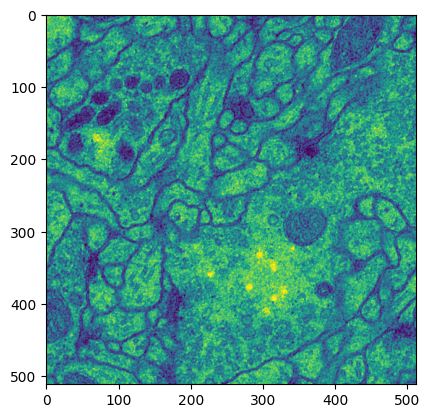

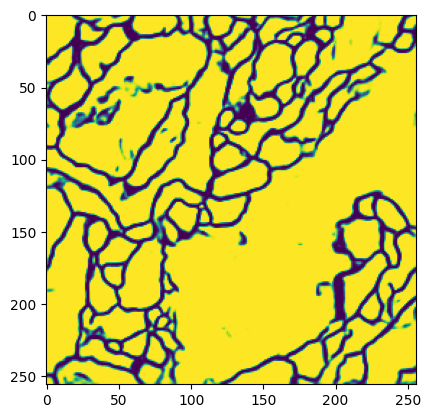

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("data/membrane/test/1.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

im = Image.open("data/membrane/test/1_predict.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'competition_data/train','images','masks',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_salt.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=2 ,callbacks=[model_checkpoint])

Epoch 1/2
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
100/100 [==============================] - 766s 8s/step - loss: 0.5979 - acc: 0.7461
Epoch 2/2
100/100 [==============================] - 843s 8s/step - loss: 0.5869 - acc: 0.7492


In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'competition_data/train','images','masks',data_gen_args,save_to_dir = None)

model = unet()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    filenames = os.listdir(test_path)
    print(filenames)
    for i in range(num_image):
        filename = filenames[i]
        print(filename)
        img = io.imread(os.path.join(test_path,filename),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [ ]:
from PIL import Image
testGene = testGenerator("competition_data/test/images")
model = unet()
model.load_weights("unet_salt.hdf5")
results = model.predict_generator(testGene,30,verbose=1)


['0005bb9630.png', '000a68e46c.png', '000c8dfb2a.png', '000d0a5f6c.png', '001ef8fc87.png', '002124aa19.png', '002af5d1e8.png', '00323f1910.png', '00329dc15c.png', '0035c56490.png', '0041cb8c49.png', '0043a01a19.png', '00565e793d.png', '005855cd72.png', '005b02dd7c.png', '0066451ce3.png', '00690a4185.png', '006d9df08a.png', '00707c7864.png', '007176e42a.png', '007c7c7dcf.png', '00801127b0.png', '008315cbd8.png', '008f8c8aaa.png', '0091fb2dab.png', '0092c53387.png', '0094822667.png', '009bfb3a78.png', '009d3365bc.png', '009e9c5f22.png', '00a052d822.png', '00a5318192.png', '00a6bfc7a7.png', '00a738b887.png', '00a9b78f49.png', '00aa6a3958.png', '00aaa5b7f4.png', '00b3ad08c8.png', '00b68675b4.png', '00b6d3a31f.png', '00bbed5966.png', '00bf25f9f9.png', '00c06147b5.png', '00c153007b.png', '00c473f654.png', '00c6225718.png', '00c6536758.png', '00cbbf2293.png', '00cde1fc96.png', '00cdefa5d6.png', '00d26ea627.png', '00d51ae232.png', '00e68bfb1b.png', '00e6e260a2.png', '00e900afb7.png', '00e9cff0

In [ ]:
print(results[29])
results1=((results * 50-24)*100)
print(results1[1])
saveResult("competition_data/test/prediction",results1.astype('uint8'))

[[[0.48990154]
  [0.48283157]
  [0.4773748 ]
  ...
  [0.47897175]
  [0.48132306]
  [0.48595005]]

 [[0.48715204]
  [0.47980118]
  [0.4740871 ]
  ...
  [0.47152442]
  [0.47385424]
  [0.48057455]]

 [[0.48624876]
  [0.4774108 ]
  [0.47233275]
  ...
  [0.46904197]
  [0.4718118 ]
  [0.47919855]]

 ...

 [[0.48776147]
  [0.4799827 ]
  [0.4769541 ]
  ...
  [0.4770268 ]
  [0.4783846 ]
  [0.48248008]]

 [[0.49037784]
  [0.4831679 ]
  [0.48096588]
  ...
  [0.48152027]
  [0.48203194]
  [0.48462918]]

 [[0.4935095 ]
  [0.48830926]
  [0.48686242]
  ...
  [0.48847917]
  [0.4900417 ]
  [0.49300584]]]
[[[ 4.8488426e+01]
  [ 1.1322403e+01]
  [-1.7668533e+01]
  ...
  [-8.5435867e+00]
  [ 4.4511795e+00]
  [ 2.8557968e+01]]

 [[ 3.4378433e+01]
  [-4.6976089e+00]
  [-3.4910583e+01]
  ...
  [-4.7863770e+01]
  [-3.4671593e+01]
  [-5.2261353e-02]]

 [[ 2.9225922e+01]
  [-1.7640114e+01]
  [-4.5110130e+01]
  ...
  [-6.1392975e+01]
  [-4.5234299e+01]
  [-6.7506790e+00]]

 ...

 [[ 3.7521744e+01]
  [-2.7076721e+

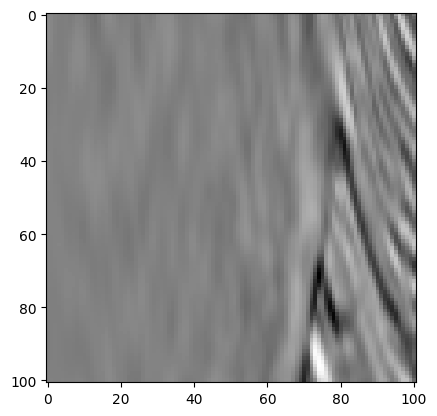

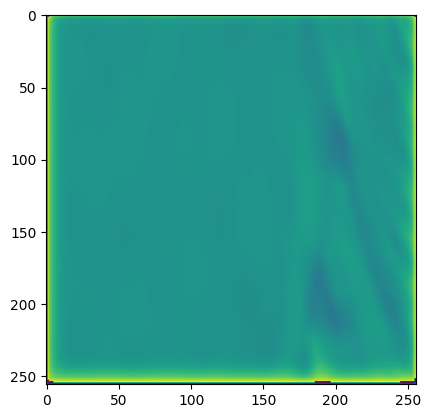

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("competition_data/test/images/001ef8fc87.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

im = Image.open("competition_data/test/prediction/4_predict.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

## [Question 2] Code reading
Read the paper [1] and read the code for the above implementation.

Answer: The network is based on a fully convolutional network. The architecture is symmetric and consists of two main parts including contracting path and expansive path.The left part is called the contracting path, represent the general convolutional process. The right part is an expansive path, represent transposed 2D convolutional layers.

In expansive path, increase the size with Upsampling and double the number of outputs with Conv. Add the output result of the corresponding part of contracting path with concatenate and merge it with Conv.

In the paper, in order to emphasize the boundary between classes, loss is weighted depending on the distance from the cell to the boundary of the class, but in the Git implementation, Binary_crossentropy (for binary classification) is used.

In [ ]:
import keras
keras.__version__

'2.0.9'

In [ ]:
! conda install scikit-image

^C


In [ ]:
import skimage
skimage.__version__

'0.19.3'